In [3]:
import pandas as pd

In [4]:
import numpy as np
df_new = pd.read_csv(r'C:\Users\sahil\Desktop\imt\lectures\term2\data science and analytics\telco.csv')

In [5]:
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
df_new.drop(['customerID'], axis=1, inplace=True)

In [304]:
df_new.columns
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df_new.TotalCharges[df_new.TotalCharges.apply(lambda x:x.isspace() == True)]
df_new["TotalCharges"] = df_new["TotalCharges"].str.replace(' ', '')

In [8]:
df_new["TotalCharges"]=pd.to_numeric(df_new["TotalCharges"])

In [9]:
df_new.TotalCharges.isna().sum()

11

In [10]:
df_new=df_new.dropna(subset=['TotalCharges'])

In [11]:
df_new["TotalCharges"] = pd.to_numeric(df_new["TotalCharges"])

<ipython-input-11-593d0a112423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["TotalCharges"] = pd.to_numeric(df_new["TotalCharges"])


In [310]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import figure
import seaborn as sns

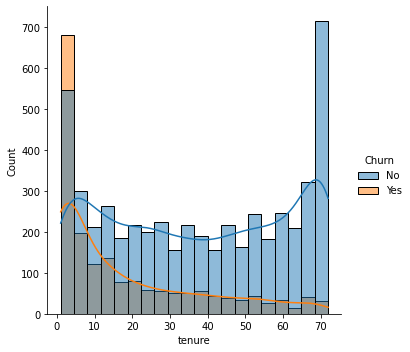

In [311]:
sns.displot(x = 'tenure',kde=True,bins = 20,hue = 'Churn', data =df_new)

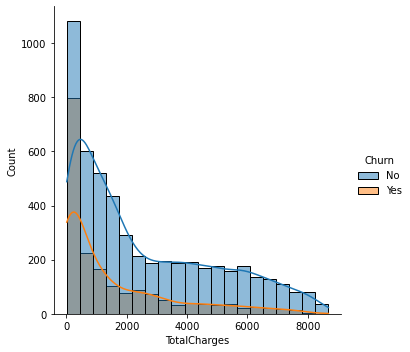

In [312]:
sns.displot(x = 'TotalCharges',kde=True,bins = 20,hue = 'Churn', data =df_new)

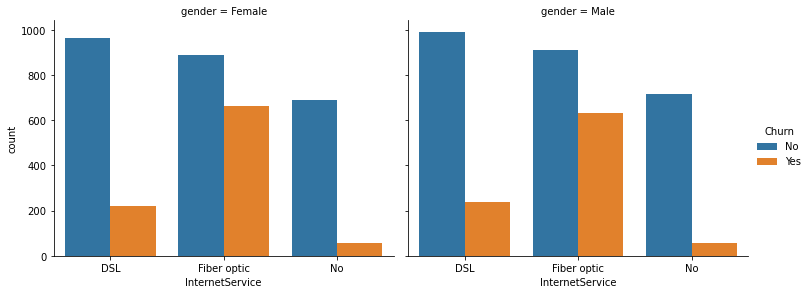

In [313]:
sns.catplot(x="InternetService", hue="Churn", col="gender",

                data=df_new, kind="count",

                height=4, aspect=1.3);

<AxesSubplot:xlabel='Contract', ylabel='count'>

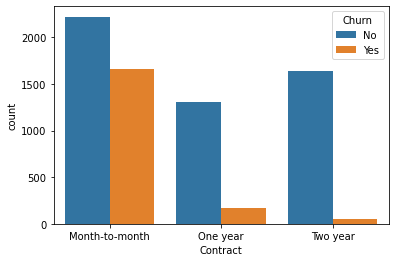

In [314]:
sns.countplot(x="Contract", hue="Churn", data=df_new)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

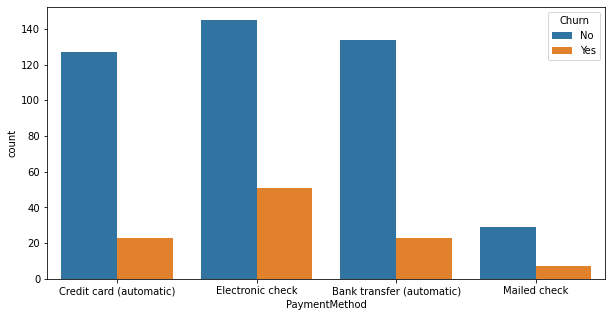

In [315]:
dfn= df_new[df_new.Contract=='One year']
plt.figure(figsize=(10, 5))

sns.countplot(x="PaymentMethod", hue="Churn", data=dfn[dfn.InternetService=='Fiber optic'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

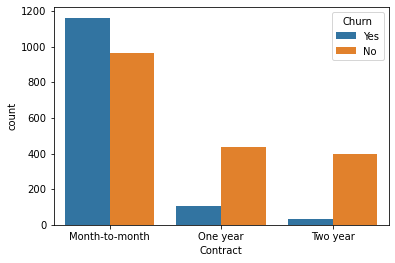

In [316]:
sns.countplot(x="Contract", hue="Churn", data=df_new[df_new.InternetService=='Fiber optic'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

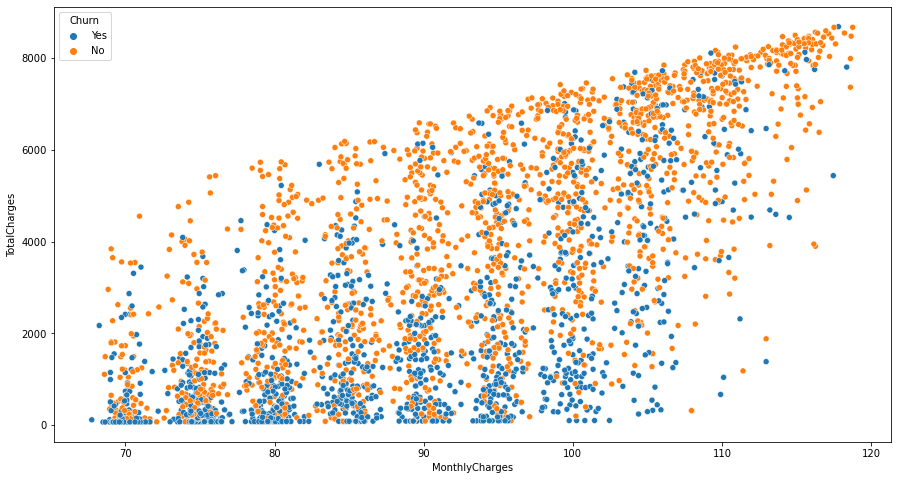

In [317]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue = 'Churn', data = df_new[df_new.InternetService=='Fiber optic'])

In [318]:
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(df_new, test_size=0.33)
input_cols = list(traindf.columns)
input_cols.remove('Churn')
target_col = 'Churn'

In [319]:
inputs_train = traindf[input_cols].copy()
targets_train = traindf[target_col].copy()
inputs_test = testdf[input_cols].copy()
targets_test = testdf[target_col].copy()
num_columns = inputs_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = inputs_train.select_dtypes('object').columns.tolist()

In [320]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [321]:
encoder.fit(df_new[cat_columns])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [322]:
encodedcols = list(encoder.get_feature_names(cat_columns))

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [323]:
inputs_train[encodedcols] = encoder.transform(inputs_train[cat_columns])
inputs_test[encodedcols] = encoder.transform(inputs_test[cat_columns])

In [324]:
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [325]:
num_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [326]:
from sklearn.linear_model import LogisticRegression

In [327]:
model = LogisticRegression()

In [336]:
model.fit(inputs_train[num_columns + encodedcols], targets_train)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [337]:
pred_train = model.predict(inputs_train[num_columns + encodedcols])

In [339]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_train, targets_train)

0.8091700275949905

In [340]:
pred_test = model.predict(inputs_test[num_columns + encodedcols])
accuracy_score(pred_test, targets_test)

0.7936234381732012